In [16]:
import psycopg2
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt

controllers_path = os.path.abspath("../historic_updater")
sys.path.append(controllers_path)

from controllers import *

## Connections

In [2]:
credentials = CredentialsManager()
pg_credentials = PgCredentialsManager(credentials)
cnx=PgConnecionManager(pg_credentials)

Credentials set
Connection sucessful


## Read data

In [3]:
# Consulta SQL
query = "SELECT * FROM public.btcusdtfutures_live"

# Cargar datos en un DataFrame
df = pd.read_sql(query, cnx.connection)

# Cerrar conexión
cnx.connection.close()

/tmp/ipykernel_90822/282707416.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx.connection)


In [4]:
df.dtypes

open_time                 datetime64[ns]
open                             float64
high                             float64
low                              float64
close                            float64
volume                           float64
close_time                datetime64[ns]
quote_asset_volume               float64
number_of_trades                   int64
taker_buy_base_volume            float64
taker_buy_quote_volume           float64
ignore                           float64
dtype: object

In [5]:
df.isnull().any()

open_time                 False
open                      False
high                      False
low                       False
close                     False
volume                    False
close_time                False
quote_asset_volume        False
number_of_trades          False
taker_buy_base_volume     False
taker_buy_quote_volume    False
ignore                    False
dtype: bool

In [6]:
df.describe()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore
count,567589,567589.000000,567589.000000,567589.000000,567589.000000,567589.000000,567589,5.675890e+05,5.675890e+05,567589.000000,5.675890e+05,567589.0
mean,2022-05-20 14:24:29.094538496,35824.264850,36225.914275,35610.508217,35870.614092,7596.091652,2022-05-20 14:29:29.093538304,1.383928e+08,4.937973e+02,3644.098562,6.868856e+07,0.0
min,2019-09-02 07:10:00,600.000000,600.000000,0.010000,228.830000,0.000000,2019-09-02 07:14:59.999000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0
25%,2021-01-13 01:00:00,17418.100000,17777.000000,17314.700000,17458.000000,243.451000,2021-01-13 01:04:59.999000064,6.171635e+06,1.080000e+02,112.682000,2.889691e+06,0.0
50%,2022-05-20 17:45:00,30378.900000,30590.000000,30247.200000,30394.600000,505.795000,2022-05-20 17:49:59.999000064,1.447681e+07,2.270000e+02,248.891000,7.125216e+06,0.0
75%,2023-09-25 10:55:00,50301.290000,50919.660000,50133.520000,50392.030000,6714.639000,2023-09-25 10:59:59.999000064,1.174954e+08,4.800000e+02,3042.149000,5.329008e+07,0.0
max,2025-01-30 03:40:00,999999.990000,1000000.000000,999999.690000,1000000.000000,967169.460000,2025-01-30 03:44:59.999000,9.950526e+09,2.052438e+06,820832.330000,7.551657e+09,0.0
std,NaN,22980.369512,24443.815579,22781.628400,23224.154781,28388.774313,NaN,3.234339e+08,5.886069e+03,13946.081424,1.631909e+08,0.0


## Data preprocessing

In [7]:
df['year']= df.open_time.dt.year
df['month']= df.open_time.dt.month

In [8]:
df.sort_values(by='open_time',ascending=False,inplace=True)
df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore,year,month
104044,2025-01-30 03:40:00,103800.00,104500.10,102073.10,103373.60,1.800,2025-01-30 03:44:59.999,1.867705e+05,77,1.129,1.176007e+05,0.0,2025,1
103755,2025-01-30 03:35:00,103500.00,106000.00,100940.20,104000.00,18.273,2025-01-30 03:39:59.999,1.871897e+06,487,4.234,4.399506e+05,0.0,2025,1
103466,2025-01-30 03:30:00,103500.00,106029.80,100719.20,103696.60,13.606,2025-01-30 03:34:59.999,1.402093e+06,467,6.530,6.798786e+05,0.0,2025,1
103177,2025-01-30 03:25:00,101992.30,105000.00,101931.40,103800.00,7.212,2025-01-30 03:29:59.999,7.464260e+05,180,4.020,4.164163e+05,0.0,2025,1
102600,2025-01-30 03:20:00,105988.80,106029.80,100719.20,101992.30,9.226,2025-01-30 03:24:59.999,9.534580e+05,293,5.234,5.435775e+05,0.0,2025,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567390,2019-09-02 07:30:00,9740.01,9741.98,9735.88,9741.00,11742.647,2019-09-02 07:34:59.999,1.429618e+09,521,5666.799,6.899566e+08,0.0,2019,9
567389,2019-09-02 07:25:00,9735.99,9742.00,9734.08,9740.01,11334.200,2019-09-02 07:29:59.999,1.379642e+09,397,5586.620,6.800527e+08,0.0,2019,9
567388,2019-09-02 07:20:00,9736.10,9741.42,9734.14,9735.05,10085.650,2019-09-02 07:24:59.999,1.227622e+09,352,4641.600,5.650122e+08,0.0,2019,9
567387,2019-09-02 07:15:00,9739.16,9742.23,9735.15,9736.39,11407.030,2019-09-02 07:19:59.999,1.388855e+09,374,7122.550,8.672433e+08,0.0,2019,9


## Year data distribution

<Axes: xlabel='year'>

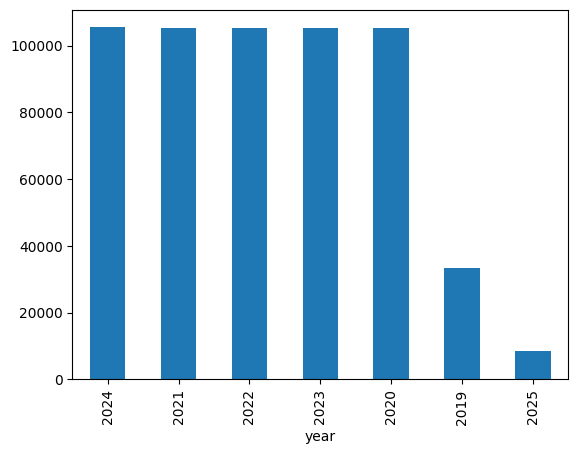

In [9]:
df.year.value_counts().plot(kind='bar')

In [10]:
df.year.value_counts()

year
2024    105408
2021    105120
2022    105120
2023    105115
2020    105106
2019     33323
2025      8397
Name: count, dtype: int64

In [11]:
df = df[df['year']>2021]

In [12]:
df.describe()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore,year,month
count,324040,324040.00000,324040.000000,324040.000000,324040.000000,324040.000000,324040,3.240400e+05,324040.000000,324040.000000,3.240400e+05,324040.0,324040.000000,324040.000000
mean,2023-07-17 13:49:21.351993344,42625.92149,42884.690527,42381.204366,42623.577481,448.125050,2023-07-17 13:54:21.350994176,1.520909e+07,234.308755,225.737595,7.671300e+06,0.0,2023.052716,6.378783
min,2022-01-01 00:00:00,15600.00000,15700.000000,15000.000000,15585.000000,0.000000,2022-01-01 00:04:59.999000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,2022.000000,1.000000
25%,2022-10-09 06:48:45,25770.85000,25918.000000,25680.175000,25768.500000,39.635500,2022-10-09 06:53:44.999000064,2.516782e+06,96.000000,17.094000,1.091811e+06,0.0,2022.000000,3.000000
50%,2023-07-17 13:37:30,36546.35000,36720.450000,36283.850000,36549.700000,337.425500,2023-07-17 13:42:29.999000064,9.164540e+06,158.000000,162.330000,4.457840e+06,0.0,2023.000000,6.000000
75%,2024-04-23 20:51:15,60470.20000,60710.875000,60197.975000,60460.000000,522.463500,2024-04-23 20:56:14.999000064,1.638601e+07,272.000000,256.665500,8.016094e+06,0.0,2024.000000,9.000000
max,2025-01-30 03:40:00,123400.00000,135236.000000,112581.900000,123300.100000,25085.728000,2025-01-30 03:44:59.999000,1.028864e+09,303808.000000,14316.255000,6.322491e+08,0.0,2025.000000,12.000000
std,NaN,22575.76453,22714.470306,22435.365613,22575.320183,921.689307,NaN,3.921546e+07,1176.659747,494.517368,2.098837e+07,0.0,0.866357,3.515266


## Indicador analisys

In [13]:
df['candle_body_price'] = df.open - df.close
df['candle_body_percent'] = df.candle_body_price/df.open *100
df['candle_range_price'] = df.high - df.low
df['candle_range_percent'] = df.candle_range_price/df.open *100


/tmp/ipykernel_90822/2817156364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['candle_body_price'] = df.open - df.close
/tmp/ipykernel_90822/2817156364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['candle_body_percent'] = df.candle_body_price/df.open *100
/tmp/ipykernel_90822/2817156364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

<Axes: xlabel='candle_body_price', ylabel='Count'>

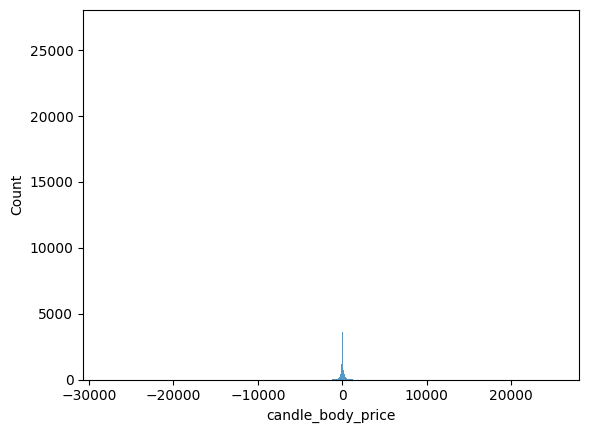

In [24]:
#Histogram
sns.histplot(
    data=df,
    x='candle_body_price',
    binwidth=3

)

In [22]:
#encontrar el binwidth optimo usando la regla Freedman-Diaconis

def freedman_diaconis_bindwidth(x):
    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR /N**(1/3)

freedman_diaconis_bindwidth(df.candle_body_price)


np.float64(3.0428467372871686)